64
(64, 128, 128, 3)
Epoch 1/150
1/1 [==============================] - 0s 208ms/step - loss: 21.1519 - acc: 0.5091 - val_loss: 1676.4619 - val_acc: 0.5556
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 1953.9664 - acc: 0.4909 - val_loss: 45.7814 - val_acc: 0.4444
Epoch 3/150
1/1 [==============================] - 0s 53ms/step - loss: 40.2835 - acc: 0.5091 - val_loss: 27.6262 - val_acc: 0.5556
Epoch 4/150
1/1 [==============================] - 0s 55ms/step - loss: 31.1680 - acc: 0.4909 - val_loss: 14.6957 - val_acc: 0.4444
Epoch 5/150
1/1 [==============================] - 0s 53ms/step - loss: 13.0709 - acc: 0.5091 - val_loss: 14.7450 - val_acc: 0.5556
Epoch 6/150
1/1 [==============================] - 0s 53ms/step - loss: 16.8352 - acc: 0.4909 - val_loss: 7.6060 - val_acc: 0.4444
Epoch 7/150
1/1 [==============================] - 0s 53ms/step - loss: 6.7195 - acc: 0.5091 - val_loss: 5.3022 - val_acc: 0.5556
Epoch 8/150
1/1 [==============================] - 0s

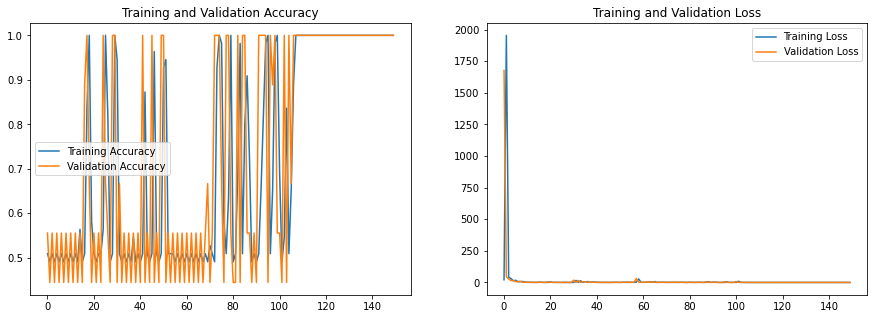

In [2]:
import os
import glob
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from pandas import Series, DataFrame
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils, generic_utils, plot_model
from six.moves import range
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_data():
    path = "D:\cat\91"
    files = os.listdir(path)
    print(len(files))
    images = []
    labels = []
    num = 64
    t = 0
    for f in files:
        img_path = path + '/' + f
        j = f.split(".")[0]
        if '_' in j:
            j = int(j.split("_")[0])
        else:
            j = int(j)

        from keras.preprocessing import image    
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        images.append(img_array)
        if j > 8:
            labels.append(1)
        else:
            labels.append(0)
        t += 1
 
    data = np.array(images)
    labels = np.array(labels)
 
    # label = np_utils.to_categorical(labels, 2)
    return data, labels ,images

data,label,images = load_data()

print(data.shape)
train_data = data[:55]
train_labels = label[:55]
validation_data = data[55:]
validation_labels = label[55:]
# images = images / 255
for i in range(len(images)):
    if i>55:
        plt.imsave(r"D:\cat\96\1\validation_{}.jpg".format(i), images[i]/255)
    else:
        plt.imsave(r"D:\cat\96\2\train_{}.jpg".format(i), images[i]/255)    
        
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels,
         epochs=150, batch_size=100,
         validation_data=(validation_data, validation_labels))

# model.save('cats_and_dogs_small_1.h5')
# os.environ["PATH"]+=os.pathsep + "D:/graphviz-2.38/release/bin/"
# plot_model(model, to_file='model.png', show_shapes=True)

def plot_acc_loss_curve(history):
    # 显示训练集和验证集的acc和loss曲线
    from matplotlib import pyplot as plt
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    #plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    #plt.grid()
    plt.show()

plot_acc_loss_curve(history)